<a href="https://colab.research.google.com/github/alyssanew/CS2A_Alcantara/blob/main/2A_ALCANTARA_EXER6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Data Loading and Reprocessing

Load the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


data = pd.read_csv('onlinefoods.csv')
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: 'onlinefoods.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Handle Missing Value

In [ ]:
print(data.isnull())

       Age  Gender  Marital Status  Occupation  Monthly Income  \
0    False   False           False       False           False   
1    False   False           False       False           False   
2    False   False           False       False           False   
3    False   False           False       False           False   
4    False   False           False       False           False   
..     ...     ...             ...         ...             ...   
383  False   False           False       False           False   
384  False   False           False       False           False   
385  False   False           False       False           False   
386  False   False           False       False           False   
387  False   False           False       False           False   

     Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                         False        False     False      False     False   
1                         False        False     

Encode Categorical Value

In [ ]:
encode_data= pd.get_dummies(data, columns=['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Output', 'Feedback' ])
print(encode_data)

     Age  Family size  latitude  longitude  Pin code Unnamed: 12  \
0     20            4   12.9766    77.5993    560001         Yes   
1     24            3   12.9770    77.5773    560009         Yes   
2     22            3   12.9551    77.6593    560017         Yes   
3     22            6   12.9473    77.5616    560019         Yes   
4     22            4   12.9850    77.5533    560010         Yes   
..   ...          ...       ...        ...       ...         ...   
383   23            2   12.9766    77.5993    560001         Yes   
384   23            4   12.9854    77.7081    560048         Yes   
385   22            5   12.9850    77.5533    560010         Yes   
386   23            2   12.9770    77.5773    560009         Yes   
387   23            5   12.8988    77.5764    560078         Yes   

     Gender_Female  Gender_Male  Marital Status_Married  \
0                1            0                       0   
1                1            0                       0   
2     

Feature Selection

In [ ]:
data_dummies = pd.get_dummies(data, drop_first=True)
data_dummies['required_age'] = (data['Age']>18).astype(int)
x = data_dummies.drop(['Age', 'Family size','latitude', 'longitude', 'Pin code'],axis=1)
y = data_dummies['required_age']

Part 2: Exploratory Data Analysis

Descriptive Statistics

In [ ]:
X_train = data.describe()
y_train = pd.Series('required_age').describe()

Visualizations

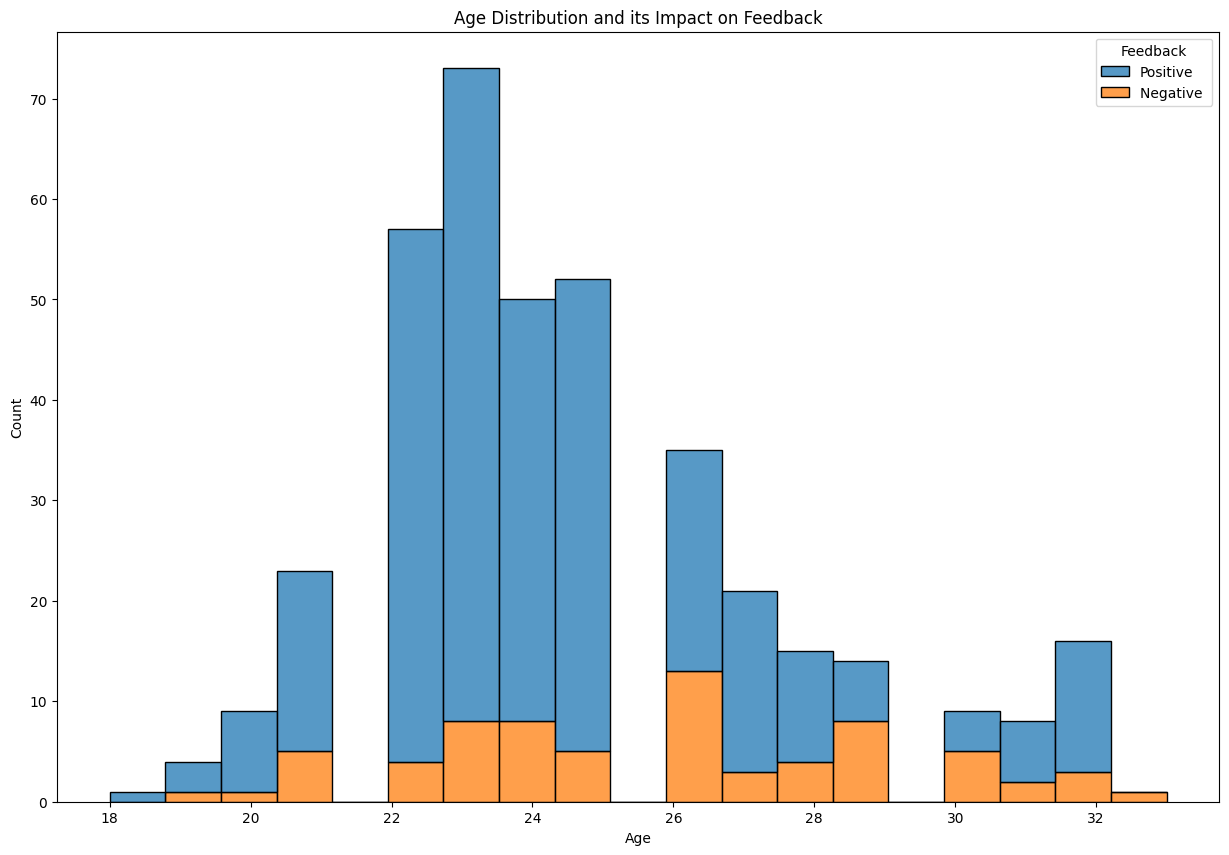

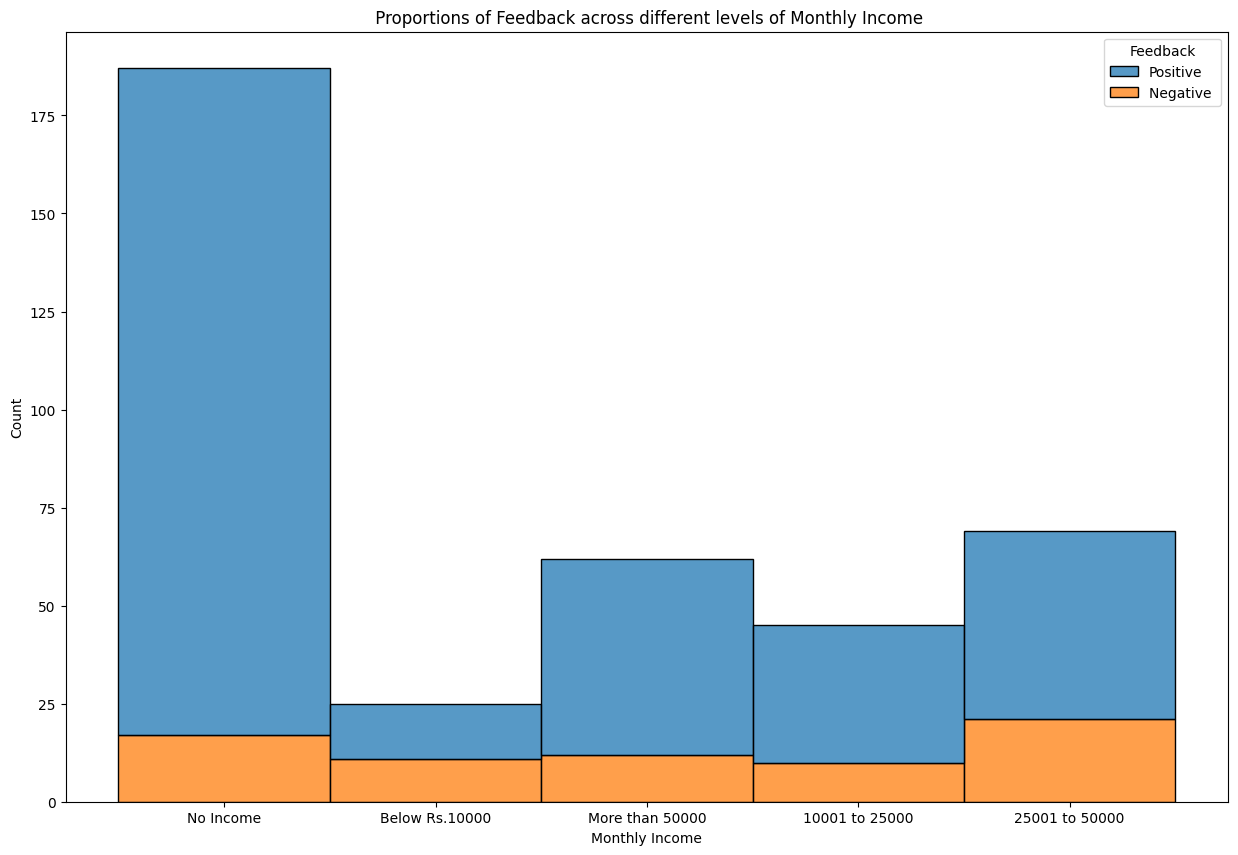

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Age Distribution and its Impact on Feedback")
sns.histplot(x="Age", hue="Feedback", data=data, multiple='stack')
plt.show()

plt.figure(figsize=(15, 10))
plt.title(" Proportions of Feedback across different levels of Monthly Income")
sns.histplot(x="Monthly Income", hue="Feedback", data=data, multiple='stack')
plt.show()


Part 3: Logistic Regression Model

Build the Model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"accuracy:{accuracy}")
print("Confusion Matrix: ")
print(conf_matrix)
print("Classification Report: ")
print(class_report)

accuracy:1.0
Confusion Matrix: 
[[78]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        78

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



Part 4: Data Analysis and Evaluation

Feature Importance

In [ ]:
ft_importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.coef_[0]})
ft_importance.sort_values(by='Importance', ascending=False, inplace=True)

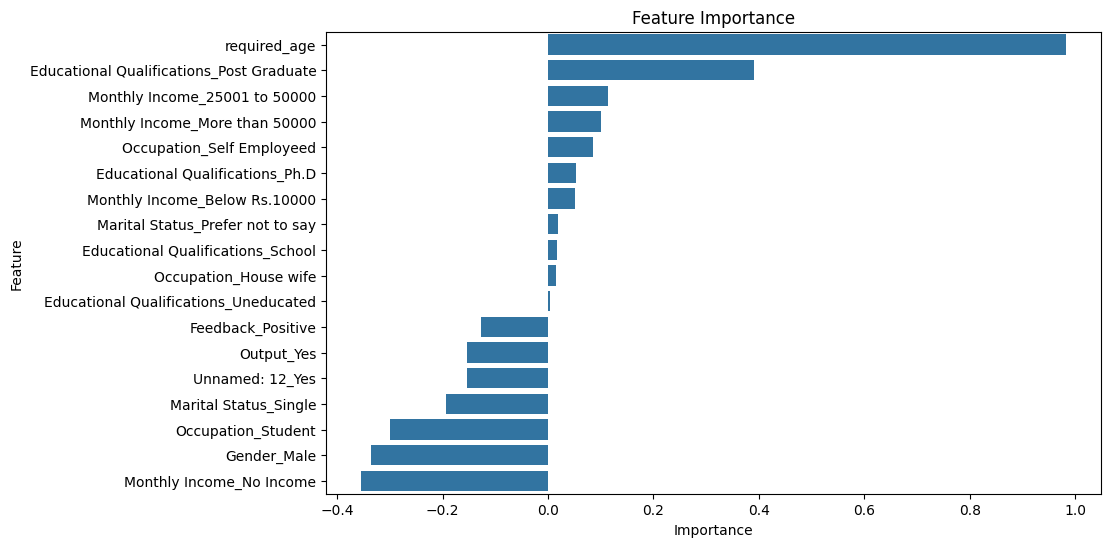

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=ft_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The results indicates that the age required has the most significant effect on predicting the feedback.



Prediction Insights

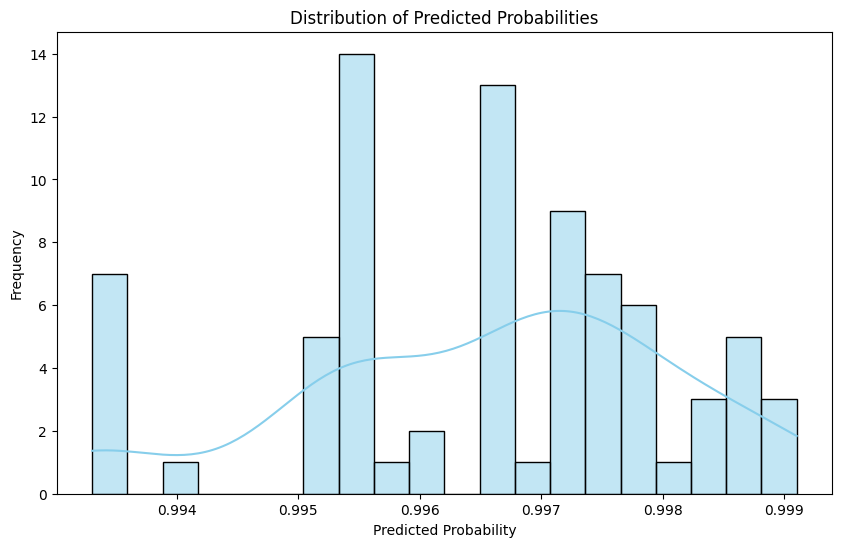

In [ ]:
y_pred_probs = model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 6))
sns.histplot(y_pred_probs, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()